<a href="https://colab.research.google.com/github/Aurelien07/stackoverflowquestions/blob/main/P5_FINAL_data_cleaning_2_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Stack Overflow part : 2/3

Utilisation de la librairie Nb Extend pour mettre le code au format PEP 8.

## Fonction importante pour le modelling :

In [7]:
# potentiellement à optimisé pour une meilleure visibilité :
def visu_yellow(data):

    # Load the text data
    Balise = data

    vectorizer = CountVectorizer()
    docs = vectorizer.fit_transform(Balise)
    features = vectorizer.get_feature_names_out()
    # plt.figure(figsize=(18,12)) # Erreur => utilisation de size
    visualizer = FreqDistVisualizer(
        features=features, orient='v', size=(1080, 720))
    visualizer.fit(docs)
    visualizer.show()

In [8]:
def print_score(model, y_test, y_pred):
    Visualisation_score[model] = {"Accuracy :", metrics.accuracy_score(y_test, y_pred),
                                  "Hamming loss :", metrics.hamming_loss(
                                      y_test, y_pred),
                                  "jaccard_score :", metrics.jaccard_score(
                                      y_test, y_pred),
                                  }
    return Visualisation_score

In [9]:
def UMAP_Corpus_Visualization (text, data) :

    corpus = text

    tfidf = TfidfVectorizer()
    docs = tfidf.fit_transform(corpus.data)
    labels = corpus.target

    # Visualizer
    umap = UMAPVisualizer()
    umap.fit(docs, labels)
    umap.show()

## Importation des données

Pour les besoins du notebook nous ne conservons que les titres, corps du texte et tags des document importés. 

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!python "/content/drive/My Drive/Colab Notebooks/Projet_5/contractions.py"

In [150]:
import pandas as pd
import numpy as np
import IPython.display
import re

# from contractions import CONTRACTION_MAP  # pour les verbes contractées
# source : https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

# Pour la visualisation graphique :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# pour le modelling des mots :
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import lxml
import html5lib
from bs4 import BeautifulSoup

# Pour la visualisation des tokens :
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

# Pour les scores :
from sklearn import metrics
from sklearn.metrics import accuracy_score, jaccard_score, hamming_loss

# Pour supprimer les warnings :
import warnings
warnings.filterwarnings("ignore")

### Pré-visualisation avant traitement :

In [13]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Projet_5/P5_exploration.csv")
data.head()

,Title,Body,Tags
0,Using A Parent Associative Foreach Loop That C...,<p>I have a form that outputs images and their...,<php><foreach><pdo><associative-array>
1,How to run sql script in mysql on Ubuntu?,<p>I am new to sql. I know I can run script wi...,<mysql><sql><script>
2,token verification failing using JWK/JWT for u...,<p>I am trying to verify an idToken using a pu...,<python><oauth-2.0><jwt><rsa><jwk>
3,"Should the ""opening work"" of a context manager...","<p>I found the <a href=""https://book.pythontip...",<python><contextmanager>
4,How to disable Github branch protection rule f...,<p>I have a git repository where some of the c...,<github>


## Pré-traitement

Pour chacune de nos opérations, nous allons utiliser la fonction %%time pour nous permettre de connaître le temps entre chaque opération.

En considérant le temps entre chaque opération, si l'opération est trop longue, il conviendra de faire un pickle pour le garder en mémoire.

### Suppression des balises Tags :

In [14]:
# Preprocess les tags
data["Tags"] = data["Tags"].str.lower() 
data["Tags"] = data["Tags"].replace({"><" : " "}, regex=True)
data["Tags"] = data["Tags"].replace({"<" : ""}, regex=True)
data["Tags"] = data["Tags"].replace({">" : ""}, regex=True)

### Création de la colonne corpus :

Nous commençons par créer une nouvelle variable associant le titre (Title) et le corps du texte (Body)

In [15]:
%%time
data['Corpus'] = data['Title'] + ' ' + data['Body']
# Certains algorithmes auront besoin d'une liste
corpus = data['Corpus'].to_list()
# Certains algorithmes auront besoin d'une liste
tags = data['Tags'].to_list()
display(data.head(5))

,Title,Body,Tags,Corpus
0,Using A Parent Associative Foreach Loop That C...,<p>I have a form that outputs images and their...,php foreach pdo associative-array,Using A Parent Associative Foreach Loop That C...
1,How to run sql script in mysql on Ubuntu?,<p>I am new to sql. I know I can run script wi...,mysql sql script,How to run sql script in mysql on Ubuntu? <p>I...
2,token verification failing using JWK/JWT for u...,<p>I am trying to verify an idToken using a pu...,python oauth-2.0 jwt rsa jwk,token verification failing using JWK/JWT for u...
3,"Should the ""opening work"" of a context manager...","<p>I found the <a href=""https://book.pythontip...",python contextmanager,"Should the ""opening work"" of a context manager..."
4,How to disable Github branch protection rule f...,<p>I have a git repository where some of the c...,github,How to disable Github branch protection rule f...


CPU times: user 42.7 ms, sys: 4.73 ms, total: 47.4 ms
Wall time: 47.4 ms


In [16]:
print("Visualisation pré-nettoyage du Corpus :")
print('')
display(data.Corpus[0])
print('')

Visualisation pré-nettoyage du Corpus :



"Using A Parent Associative Foreach Loop That Contains A Glob Function (to delete files) and a PDO Statement To Update A Database - PHP <p>I have a form that outputs images and their related titles and tags via a <code>while</code> loop, and at the bottom of this form I have the option to delete an image.</p>\n<p>Because the input elements inside the form produce an array of values, when deleting an image I need to run the PDO statements and PHP <code>glob</code> methods that delete the images from their folders inside a parent foreach loop.</p>\n<p>I cannot get this to work though. Without the foreach loop I'm getting the PHP <code>Array to string conversion</code> error, which I understand/expect. This error throws on the line <code>$stmt-&gt;bindParam(':image_id', $image_id);</code> in the second section of code below.</p>\n<p>I think I need to wrap the code from in-between the <code>// ---- START FOREACH ?</code> and <code>// ---- END FOREACH ?</code> comments in an associative for

### Nettoyage HTML via beautiful soup :

Nous allons maintenant nettoyer les données en rapport avec les balises HTML.

In [17]:
%%time

def clean_html(text_html):
    soup = BeautifulSoup(text_html, "html5lib")
    for element in soup.find_all("code"):
        # print(element)
        element.decompose()
    return soup.get_text().replace("\n", " ")


corpus_del_bal = [clean_html(text) for text in corpus]
data['Corpus'] = data['Corpus'].apply(lambda x : clean_html(x))

CPU times: user 3min 30s, sys: 445 ms, total: 3min 31s
Wall time: 3min 36s


In [18]:
print("Visualisation du nettoyage Beautiful Soup :")
print('')
display(corpus_del_bal[0])
print('')

Visualisation du nettoyage Beautiful Soup :



"Using A Parent Associative Foreach Loop That Contains A Glob Function (to delete files) and a PDO Statement To Update A Database - PHP I have a form that outputs images and their related titles and tags via a  loop, and at the bottom of this form I have the option to delete an image. Because the input elements inside the form produce an array of values, when deleting an image I need to run the PDO statements and PHP  methods that delete the images from their folders inside a parent foreach loop. I cannot get this to work though. Without the foreach loop I'm getting the PHP  error, which I understand/expect. This error throws on the line  in the second section of code below. I think I need to wrap the code from in-between the  and  comments in an associative foreach loop, but I can't work how to do this in terms of the key/value pairs? Any help would be really appreciated. Output onto page (the issue is in the block of code after this)  Deleting An Image  "

#### Visualisation Yellowbricks en token :

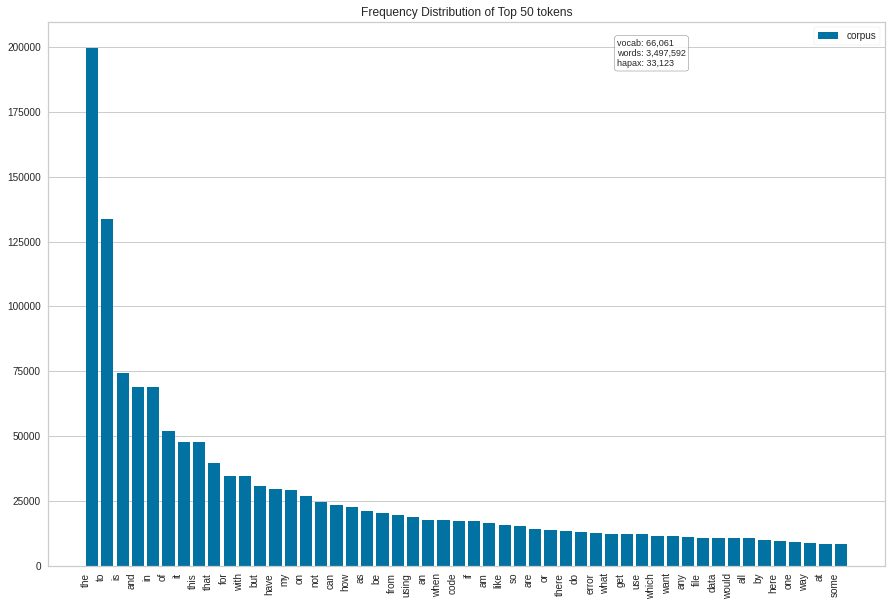

In [19]:
visu_yellow(corpus_del_bal)

On voit qu'il y a toujours des mots redondants qui ne servent à rien à l'analyse.

### Nettoyage du texte (Suppression des fins de lignes et des chiffres) :

ici, nous supprimons les fins de lignes et les chiffres.

In [20]:
%%time


def text_cleaning(text):
    text = re.sub('\w*\d\w*', '', text)  # supprimer tout les chiffres
    text = re.sub(r'\n', '', text)  # retirer les fins de lignes
    text = re.sub(r'\s+', ' ', text)  # retirer les fins de lignes de corpus
    # text = re.split("," , " ")
    return text


corpus_x = [text_cleaning(text) for text in corpus_del_bal]  # pour la liste
tags_x = [text_cleaning(text).strip() for text in tags]  # pour la liste
data['Corpus'] = data['Corpus'].apply(lambda x : text_cleaning(x))

CPU times: user 7.73 s, sys: 36 ms, total: 7.77 s
Wall time: 7.78 s


In [21]:
print('-'*45)
print("Visualisation du nettoyage texte sur le corpus :")
print('-'*45)
display(corpus_x[0])
print("")

print('-'*45)
print("Visualisation du nettoyage texte sur les tags :")
print('-'*45)
display(tags_x[0])
print("")

---------------------------------------------
Visualisation du nettoyage texte sur le corpus :
---------------------------------------------


"Using A Parent Associative Foreach Loop That Contains A Glob Function (to delete files) and a PDO Statement To Update A Database - PHP I have a form that outputs images and their related titles and tags via a loop, and at the bottom of this form I have the option to delete an image. Because the input elements inside the form produce an array of values, when deleting an image I need to run the PDO statements and PHP methods that delete the images from their folders inside a parent foreach loop. I cannot get this to work though. Without the foreach loop I'm getting the PHP error, which I understand/expect. This error throws on the line in the second section of code below. I think I need to wrap the code from in-between the and comments in an associative foreach loop, but I can't work how to do this in terms of the key/value pairs? Any help would be really appreciated. Output onto page (the issue is in the block of code after this) Deleting An Image "


---------------------------------------------
Visualisation du nettoyage texte sur les tags :
---------------------------------------------


'php foreach pdo associative-array'

#### Visualisation Yellowbricks en token :

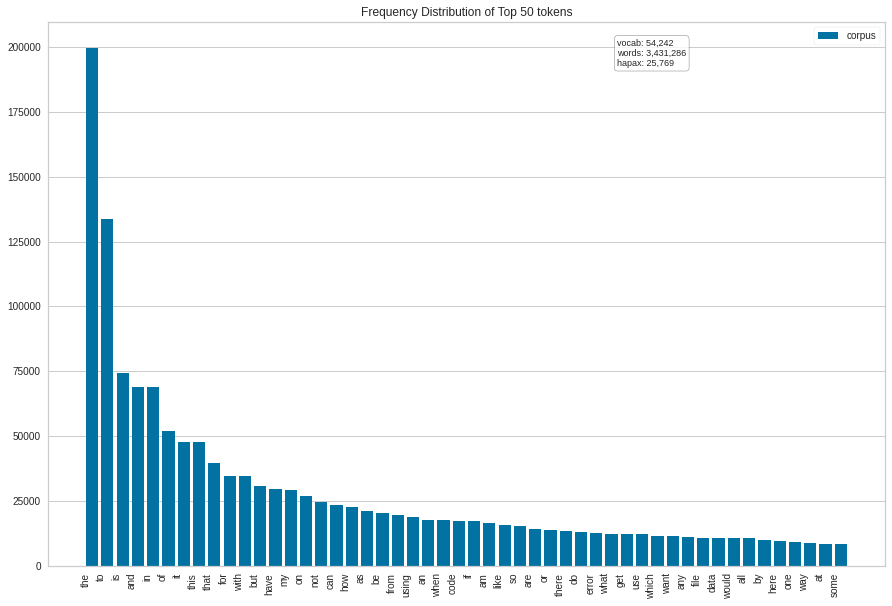

In [22]:
visu_yellow(corpus_x)

Le corpus pré-nettoyé reste actuellement inutilisable.

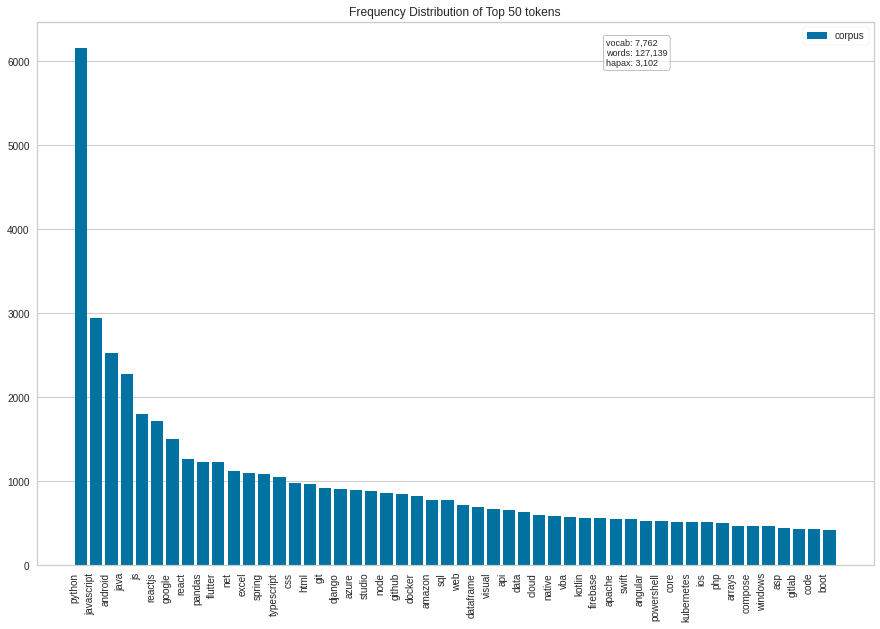

In [23]:
visu_yellow(tags_x)

Ici, on peut voir que les Tags sont bien représentés.

### Suppression des verbes contractées :

Suppression des formes contractés des verbes.

In [24]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [25]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match)\
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [26]:
%%time
corpus_x = [expand_contractions(text) for text in corpus_del_bal]
tags_x = [expand_contractions(text).strip() for text in tags]
# data['Corpus'] = data['Corpus'].apply(lambda x : expand_contractions(x))

CPU times: user 36.1 s, sys: 81.5 ms, total: 36.1 s
Wall time: 36.2 s


In [27]:
print('-'*60)
print("Visualisation de la suppression des verbes contractés sur le corpus :")
print('-'*60)
display(corpus_x[0])
print("")

print('-'*60)
print("Visualisation de la suppression des verbes contractés sur les tags :")
print('-'*60)
display(tags_x[0])
print("")

------------------------------------------------------------
Visualisation de la suppression des verbes contractés sur le corpus :
------------------------------------------------------------


'Using A Parent Associative Foreach Loop That Contains A Glob Function (to delete files) and a PDO Statement To Update A Database - PHP I have a form that outputs images and their related titles and tags via a  loop, and at the bottom of this form I have the option to delete an image. Because the input elements inside the form produce an array of values, when deleting an image I need to run the PDO statements and PHP  methods that delete the images from their folders inside a parent foreach loop. I cannot get this to work though. Without the foreach loop I am getting the PHP  error, which I understand/expect. This error throws on the line  in the second section of code below. I think I need to wrap the code from in-between the  and  comments in an associative foreach loop, but I cannot work how to do this in terms of the key/value pairs? Any help would be really appreciated. Output onto page (the issue is in the block of code after this)  Deleting An Image  '


------------------------------------------------------------
Visualisation de la suppression des verbes contractés sur les tags :
------------------------------------------------------------


'php foreach pdo associative-array'

#### Visualisation Yellowbricks en token :

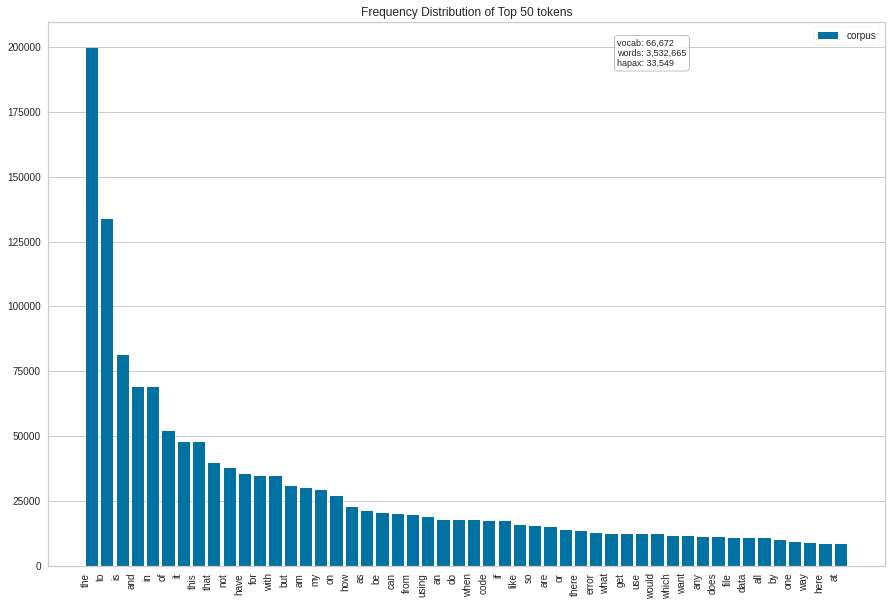

In [28]:
visu_yellow(corpus_x)

Peu de difference ici, vu que les mots contractées ne doivent pas être dans le top 50.

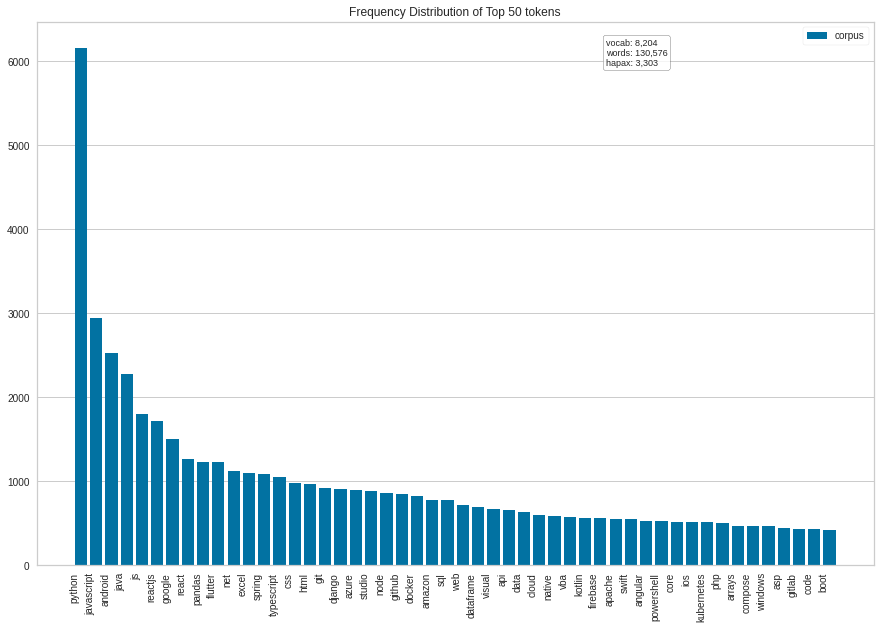

In [29]:
visu_yellow(tags_x)

Idem les tags étant déjà des termes spécifiques, pas de raison de retrouver une difference entre les 2.

### Tokenization + suppression des stopwords :

La tokenisation consiste essentielleent à diviser une phrase, paragraphe ou un document de texte en unités plus petites, entant que mots ou termes individuels. On appelle ces mots des tokens d'ou tokenisation.

Un stopword est un mot qui est tellement commun qu'il est inutile de l'indexer ou de l'utiliser dans une recherche.

In [30]:
import string  # permet d'avoir accés à toute les ponctuations.
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
def tokenize(text):

    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)

    try:
        res = word_tokenize(text, language='english')
    except TypeError:
        return text

    res = [token for token in res if token not in punctuation]
    res = [token for token in res if token not in stop_words]
   # res = [token for token in res if token not in letters]
    return res

In [32]:
%%time
corpus_token = [tokenize(text) for text in corpus_x]
tag_token = [tokenize(text) for text in tags_x]
# data['Corpus'] = data['Corpus'].apply(lambda x : tokenize(x))

CPU times: user 42.1 s, sys: 1.33 s, total: 43.5 s
Wall time: 43.5 s


In [33]:
print('-'*65)
print("Visualisation de la suppression de la tokennisation sur le corpus :")
print('-'*65)
display(corpus_token[0])
print("")

print('-'*65)
print("Visualisation de la suppression de la tokennisation sur les tags :")
print('-'*65)
display(tag_token[0])
print('')

-----------------------------------------------------------------
Visualisation de la suppression de la tokennisation sur le corpus :
-----------------------------------------------------------------


['Using',
 'A',
 'Parent',
 'Associative',
 'Foreach',
 'Loop',
 'That',
 'Contains',
 'A',
 'Glob',
 'Function',
 'delete',
 'files',
 'PDO',
 'Statement',
 'To',
 'Update',
 'A',
 'Database',
 'PHP',
 'I',
 'form',
 'outputs',
 'images',
 'related',
 'titles',
 'tags',
 'via',
 'loop',
 'bottom',
 'form',
 'I',
 'option',
 'delete',
 'image',
 'Because',
 'input',
 'elements',
 'inside',
 'form',
 'produce',
 'array',
 'values',
 'deleting',
 'image',
 'I',
 'need',
 'run',
 'PDO',
 'statements',
 'PHP',
 'methods',
 'delete',
 'images',
 'folders',
 'inside',
 'parent',
 'foreach',
 'loop',
 'I',
 'get',
 'work',
 'though',
 'Without',
 'foreach',
 'loop',
 'I',
 'getting',
 'PHP',
 'error',
 'I',
 'understand/expect',
 'This',
 'error',
 'throws',
 'line',
 'second',
 'section',
 'code',
 'I',
 'think',
 'I',
 'need',
 'wrap',
 'code',
 'in-between',
 'comments',
 'associative',
 'foreach',
 'loop',
 'I',
 'work',
 'terms',
 'key/value',
 'pairs',
 'Any',
 'help',
 'would',
 'reall


-----------------------------------------------------------------
Visualisation de la suppression de la tokennisation sur les tags :
-----------------------------------------------------------------


['php', 'foreach', 'pdo', 'associative-array']

###  POS tagging :

Parts of Speech (POS) Tagging. Parts of speech tagging simply refers to assigning parts of speech to individual words in a sentence, which means that, unlike phrase matching, which is performed at the sentence or multi-word level, parts of speech tagging is performed at the token level.

source : https://stackabuse.com/python-for-nlp-parts-of-speech-tagging-and-named-entity-recognition/

NN: noun, common, singular or mass

In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [35]:
def filtering_nouns(text):

    res = nltk.pos_tag(text)

    res = [token[0] for token in res if token[1] == 'NN']# Rajouter adverbe etc etc

    return res

In [36]:
%%time
nn_corpus = [filtering_nouns(tokens) for tokens in corpus_token]

CPU times: user 2min 6s, sys: 817 ms, total: 2min 7s
Wall time: 2min 8s


In [37]:
print('-'*65)
print("Visualisation du POS Tagging sur le corpus :")
print('-'*65)
display(nn_corpus[0])
print("")

-----------------------------------------------------------------
Visualisation du POS Tagging sur le corpus :
-----------------------------------------------------------------


['delete',
 'loop',
 'form',
 'option',
 'image',
 'input',
 'form',
 'array',
 'image',
 'parent',
 'foreach',
 'loop',
 'foreach',
 'loop',
 'error',
 'error',
 'line',
 'section',
 'code',
 'code',
 'foreach',
 'loop',
 'help',
 'issue',
 'block',
 'code',
 'Image']

### Lemmatisation

La lemmatisation désigne un traitement lexical apporté à un texte en vue de son classement dans un index ou de son analyse. Ce traitement consiste à appliquer aux occurrences des lexèmes sujets à flexion un codage renvoyant à leur entrée lexicale commune, que l'on désigne sous le terme de lemme.

source : Wikipedia

In [38]:
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [39]:
def lemmatisation(text):

    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    res = [lemmatizer.lemmatize(word, wordnet.VERB) for word in text]
    res = [lemmatizer.lemmatize(word, wordnet.ADJ) for word in res]
    res = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in res]
    res = [lemmatizer.lemmatize(word, wordnet.ADV) for word in res]
    return res

In [40]:
%%time
corpus_lem = [lemmatisation(tokens) for tokens in nn_corpus]
tags_lem = [lemmatisation(tokens) for tokens in tag_token]
# data['Corpus'] = data['Corpus'].apply(lambda x : lemmatisation(x))

tags_liste = []
for tokens in tags_lem:
    tokens = [token for token in tokens if len(token) > 1]
    tags_liste.append(tokens)

CPU times: user 10.3 s, sys: 97.1 ms, total: 10.4 s
Wall time: 10.4 s


In [41]:
print('-'*65)
print("Visualisation de la lemmatisation sur le corpus :")
print('-'*65)
display(corpus_lem[0])
print("")

print('-'*65)
print("Visualisation de la lemmatisation sur les Tags")
print('-'*65)
display(tags_lem[0])
print("")

-----------------------------------------------------------------
Visualisation de la lemmatisation sur le corpus :
-----------------------------------------------------------------


['delete',
 'loop',
 'form',
 'option',
 'image',
 'input',
 'form',
 'array',
 'image',
 'parent',
 'foreach',
 'loop',
 'foreach',
 'loop',
 'error',
 'error',
 'line',
 'section',
 'code',
 'code',
 'foreach',
 'loop',
 'help',
 'issue',
 'block',
 'code',
 'Image']


-----------------------------------------------------------------
Visualisation de la lemmatisation sur les Tags
-----------------------------------------------------------------


['php', 'foreach', 'pdo', 'associative-array']

# Features Engineering :

## Création des colonnes de preprocessing et création d'un nouveau DF :

In [42]:
# remettre sous forme de phrase et non sous forme de liste
corpus_df = [" ".join(text) for text in corpus_lem]
# On crée un dataframe
corpus_df = pd.DataFrame(corpus_df, columns=['corpus_preprocessing'])

In [43]:
corpus_df

,corpus_preprocessing
0,delete loop form option image input form array...
1,script mysql sql path way path path
2,verification authentication python decode func...
3,work context manager example manager file sugg...
4,branch protection rule configuration branch br...
...,...
31159,class compile time class compile time code sni...
31160,inline constraint function implementation look...
31161,classname javascript change class name li
31162,input change size shape tap shape user input e...


In [44]:
tags_df = [" ".join(tags) for tags in tags_liste]
tags_df = pd.DataFrame(tags_df, columns=['tags_preprocessing'])

In [45]:
tags_df

,tags_preprocessing
0,php foreach pdo associative-array
1,mysql sql script
2,python oauth-2.0 jwt rsa jwk
3,python contextmanager
4,github
...,...
31159,c++ c-preprocessor c++20 template-meta-program...
31160,typescript typescript-generics tsc generic-con...
31161,javascript html cs
31162,swift swiftui augmented-reality realitykit


In [46]:
df_final = pd.concat([corpus_df, tags_df], axis=1)

In [47]:
df_final['corpus_preprocessing'] = df_final['corpus_preprocessing'].apply(
    lambda x: x.split(' '))
df_final['tags_preprocessing'] = df_final['tags_preprocessing'].apply(
    lambda x: x.split(' '))

In [48]:
corpus_final = df_final['corpus_preprocessing'].to_list()
tags_final = df_final['tags_preprocessing'].to_list()
data_corpus_base = data['Corpus'].to_list()

In [49]:
df_visualisation = pd.concat([data['Corpus'],
                              data['Tags'],
                              df_final['corpus_preprocessing'],
                              df_final['tags_preprocessing']],
                             axis=1)

In [50]:
display(df_visualisation.head())
# Ici on voit bien qu'on a nos tags modifiés et non modifiés,.
# on pourra supprimer les balises via regex par la suite pour les tags

,Corpus,Tags,corpus_preprocessing,tags_preprocessing
0,Using A Parent Associative Foreach Loop That C...,php foreach pdo associative-array,"[delete, loop, form, option, image, input, for...","[php, foreach, pdo, associative-array]"
1,How to run sql script in mysql on Ubuntu? I am...,mysql sql script,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]"
2,token verification failing using JWK/JWT for u...,python oauth-2.0 jwt rsa jwk,"[verification, authentication, python, decode,...","[python, oauth-2.0, jwt, rsa, jwk]"
3,"Should the ""opening work"" of a context manager...",python contextmanager,"[work, context, manager, example, manager, fil...","[python, contextmanager]"
4,How to disable Github branch protection rule f...,github,"[branch, protection, rule, configuration, bran...",[github]


In [51]:
# Faire un CSV to dataframe pour éviter de tout relancer

Avant de calculer le bag of Word, le tf idf et le nmf, on va réduire le nombre de tags pour notre analyse.

## Comptage des Tags :

In [52]:
df_visualisation["Tags_count"] = df_visualisation["Tags"].apply(lambda x : len(x.split()))
df_visualisation.head()

,Corpus,Tags,corpus_preprocessing,tags_preprocessing,Tags_count
0,Using A Parent Associative Foreach Loop That C...,php foreach pdo associative-array,"[delete, loop, form, option, image, input, for...","[php, foreach, pdo, associative-array]",4
1,How to run sql script in mysql on Ubuntu? I am...,mysql sql script,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",3
2,token verification failing using JWK/JWT for u...,python oauth-2.0 jwt rsa jwk,"[verification, authentication, python, decode,...","[python, oauth-2.0, jwt, rsa, jwk]",5
3,"Should the ""opening work"" of a context manager...",python contextmanager,"[work, context, manager, example, manager, fil...","[python, contextmanager]",2
4,How to disable Github branch protection rule f...,github,"[branch, protection, rule, configuration, bran...",[github],1


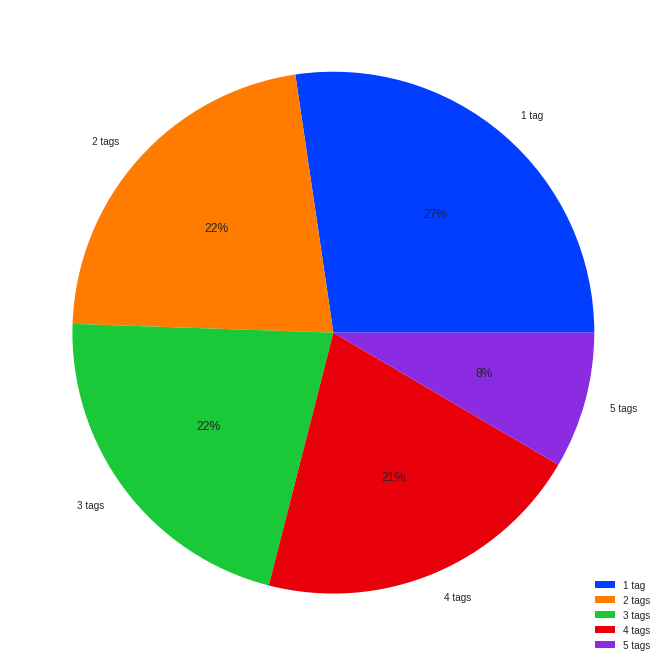

In [53]:
#define data
plt.figure(figsize=(12,12))
data = df_visualisation["Tags_count"].value_counts()
labels = ['1 tag', '2 tags', '3 tags', '4 tags', '5 tags']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(labels)
plt.show()

In [54]:
print( "Le nombre de Tags dans une question est au nombre de : ", '\033[1m'+ str(round(df_visualisation["Tags_count"].mean(),2)) + '\033[0m')

Le nombre de Tags dans une question est au nombre de :  3.25


# Enregistrer le dataframe dans un CSV :

In [55]:
# df_visualisation.to_csv("P5_final.csv", index=False) # Cela permettra d'éviter d'attendre de relancer le notebook.

# Analyse non supervisée :

In [56]:
df_visualisation

,Corpus,Tags,corpus_preprocessing,tags_preprocessing,Tags_count
0,Using A Parent Associative Foreach Loop That C...,php foreach pdo associative-array,"[delete, loop, form, option, image, input, for...","[php, foreach, pdo, associative-array]",4
1,How to run sql script in mysql on Ubuntu? I am...,mysql sql script,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",3
2,token verification failing using JWK/JWT for u...,python oauth-2.0 jwt rsa jwk,"[verification, authentication, python, decode,...","[python, oauth-2.0, jwt, rsa, jwk]",5
3,"Should the ""opening work"" of a context manager...",python contextmanager,"[work, context, manager, example, manager, fil...","[python, contextmanager]",2
4,How to disable Github branch protection rule f...,github,"[branch, protection, rule, configuration, bran...",[github],1
...,...,...,...,...,...
31159,C++ Separate different instances of a class at...,c++ c-preprocessor c++20 template-meta-program...,"[class, compile, time, class, compile, time, c...","[c++, c-preprocessor, c++20, template-meta-pro...",4
31160,Why does tsc inline generic constraint? I have...,typescript typescript-generics tsc generic-con...,"[inline, constraint, function, implementation,...","[typescript, typescript-generics, tsc, generic...",4
31161,changing the classname of the specific Li that...,javascript html css,"[classname, javascript, change, class, name, li]","[javascript, html, cs]",3
31162,User input to change size of shape that is gen...,swift swiftui augmented-reality realitykit,"[input, change, size, shape, tap, shape, user,...","[swift, swiftui, augmented-reality, realitykit]",4


## BOW :

### Pour les tags : 

In [57]:
from nltk.tokenize import word_tokenize

In [58]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_bow = vectorizer.fit_transform(df_visualisation['Tags'])

In [59]:
print("Nombres de questions :", tag_bow.shape[0])
print("Nombres de tags uniques :", tag_bow.shape[1])

Nombres de questions : 31164
Nombres de tags uniques : 11383


Visualisation des 10 premiers Tags :

In [60]:
tags_name = vectorizer.get_feature_names_out()
print("Visualisation des 10 premiers tags pour le BOW :", tags_name[:10])

Visualisation des 10 premiers tags pour le BOW : ['.class-file' '.d.ts' '.git-folder' '.htaccess' '.net' '.net-4.0'
 '.net-4.5' '.net-4.6.1' '.net-4.8' '.net-5']


In [61]:
frequence = tag_bow.sum(axis=0).A1 # Equivalent to ravel
tag_dict = dict(zip(tags, frequence))

In [62]:
liste = []
for key, value in tag_dict.items():
  liste.append([key, value]) 

In [63]:
tag_counting = pd.DataFrame(liste, columns=['Tags', 'Counts'])
tag_counting.head(10)

,Tags,Counts
0,php foreach pdo associative-array,2
1,mysql sql script,2
2,python oauth-2.0 jwt rsa jwk,1
3,python contextmanager,24
4,github,1
5,go go-modules,1
6,go struct,1
7,python pandas duplicates pandas-groupby,2
8,python list slice,12
9,tensorflow machine-learning keras computer-vis...,11


In [64]:
display(tag_counting.max())
display(tag_counting.min())

Tags      zsh zshrc zsh-completion
Counts                        5076
dtype: object

Tags      .net amazon-web-services oauth-2.0 amazon-cogn...
Counts                                                    1
dtype: object

Text(0, 0.5, 'Fréquence')

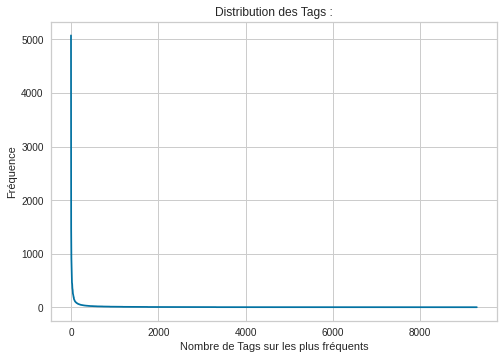

In [65]:
tag_counting_graph = tag_counting.sort_values(['Counts'], ascending=False)
plt.plot(tag_counting_graph['Counts'].values)
plt.grid(True)
plt.title("Distribution des Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

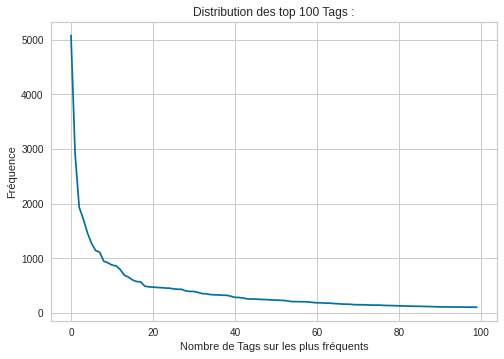

In [66]:
plt.plot(tag_counting_graph['Counts'][0:100].values)
plt.grid(True)
plt.title("Distribution des top 100 Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

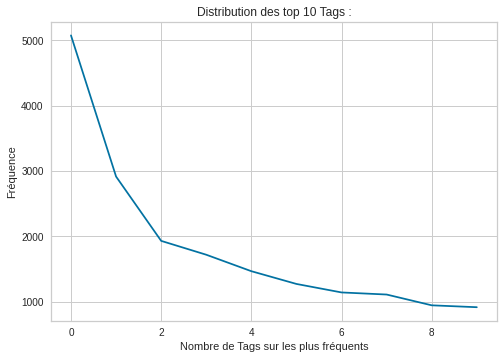

In [67]:
plt.plot(tag_counting_graph['Counts'][0:10].values)
plt.grid(True)
plt.title("Distribution des top 10 Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

On peut voir qu'à partir de 8 on commence à avoir une fréquence inférieur à 1000, on aurait donc tendance à garder 1000 en fréquence.

Et 8 en tag number max

In [68]:
print("{} tags qui sont utilisés plus de 10 fois".format(tag_counting[tag_counting["Counts"]>10].shape[0]))
print("{} tags qui sont utilisés plus de 25 fois".format(tag_counting[tag_counting["Counts"]>25].shape[0]))
print("{} tags qui sont utilisés plus de 50 fois".format(tag_counting[tag_counting["Counts"]>50].shape[0]))
print("{} tags qui sont utilisés plus de 100 fois".format(tag_counting[tag_counting["Counts"]>100].shape[0]))
print("{} tags qui sont utilisés plus de 200 fois".format(tag_counting[tag_counting["Counts"]>200].shape[0]))
print("{} tags qui sont utilisés plus de 500 fois".format(tag_counting[tag_counting["Counts"]>500].shape[0]))

972 tags qui sont utilisés plus de 10 fois
400 tags qui sont utilisés plus de 25 fois
206 tags qui sont utilisés plus de 50 fois
103 tags qui sont utilisés plus de 100 fois
59 tags qui sont utilisés plus de 200 fois
18 tags qui sont utilisés plus de 500 fois


On peut voir confirmation que le top 206 tags sont utilisés plus de 50x, donc interessant à mettre en place.

In [69]:
"""df_visualisation['Corpus'] = df_visualisation['Corpus'].str.lower()
df_visualisation['Corpus'] = df_visualisation['Corpus'].apply(lambda x : tokenize(x))
df_visualisation['Corpus'] = df_visualisation['Corpus'].apply(lambda x : filtering_nouns(x))
df_visualisation['Corpus'] = df_visualisation['Corpus'].apply(lambda x : lemmatisation(x))"""

"df_visualisation['Corpus'] = df_visualisation['Corpus'].str.lower()\ndf_visualisation['Corpus'] = df_visualisation['Corpus'].apply(lambda x : tokenize(x))\ndf_visualisation['Corpus'] = df_visualisation['Corpus'].apply(lambda x : filtering_nouns(x))\ndf_visualisation['Corpus'] = df_visualisation['Corpus'].apply(lambda x : lemmatisation(x))"

In [70]:
df_visualisation["Corpus"] = df_visualisation["corpus_preprocessing"].apply(lambda x : " ".join(x))

In [71]:
df_visualisation

,Corpus,Tags,corpus_preprocessing,tags_preprocessing,Tags_count
0,delete loop form option image input form array...,php foreach pdo associative-array,"[delete, loop, form, option, image, input, for...","[php, foreach, pdo, associative-array]",4
1,script mysql sql path way path path,mysql sql script,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",3
2,verification authentication python decode func...,python oauth-2.0 jwt rsa jwk,"[verification, authentication, python, decode,...","[python, oauth-2.0, jwt, rsa, jwk]",5
3,work context manager example manager file sugg...,python contextmanager,"[work, context, manager, example, manager, fil...","[python, contextmanager]",2
4,branch protection rule configuration branch br...,github,"[branch, protection, rule, configuration, bran...",[github],1
...,...,...,...,...,...
31159,class compile time class compile time code sni...,c++ c-preprocessor c++20 template-meta-program...,"[class, compile, time, class, compile, time, c...","[c++, c-preprocessor, c++20, template-meta-pro...",4
31160,inline constraint function implementation look...,typescript typescript-generics tsc generic-con...,"[inline, constraint, function, implementation,...","[typescript, typescript-generics, tsc, generic...",4
31161,classname javascript change class name li,javascript html css,"[classname, javascript, change, class, name, li]","[javascript, html, cs]",3
31162,input change size shape tap shape user input e...,swift swiftui augmented-reality realitykit,"[input, change, size, shape, tap, shape, user,...","[swift, swiftui, augmented-reality, realitykit]",4


In [72]:
def bag_of_words (texts) :
    data = texts
    cv = CountVectorizer(min_df = 200).fit(data)
    bow = cv.transform(data)
    
   # print ("Taille : ",  len (cv.vocabulary_))
   # print ("Contenu : ",  cv.vocabulary_) # too long
    
   # Nombre de lignes et de colonnes de la matrice via Bag Of Words :
   # print(bow.toarray().shape)
    
    data = pd.DataFrame.from_dict(cv.vocabulary_, orient='index',
                       columns=['Frequency'])
    data = data.sort_values(by=['Frequency'], ascending = False)
    data = data[data['Frequency']>200]
    
    data['percent'] = round((data['Frequency'])*100/ data['Frequency'].sum(),2)
    
    return(data, bow)

### Création d'un DataFrame de visualisation + une matrice :

In [73]:
%%time
data_bow,bow = bag_of_words(df_visualisation["Corpus"])

CPU times: user 980 ms, sys: 14 ms, total: 994 ms
Wall time: 1.01 s


In [74]:
print("Nombres de questions pour le BOW:", bow.shape[0])
print("Nombres de tags uniques pour le BOW :", bow.shape[1])

Nombres de questions pour le BOW: 31164
Nombres de tags uniques pour le BOW : 396


#### Visualisation : 

In [75]:
data_bow

,Frequency,percent
year,395,0.68
work,394,0.68
word,393,0.68
window,392,0.67
website,391,0.67
...,...,...
location,205,0.35
load,204,0.35
list,203,0.35
link,202,0.35


### Vectorisation :

In [76]:
%%time
cv = CountVectorizer(min_df = 200)
data_bow_2 = cv.fit_transform(df_visualisation["Corpus"])
data_bow_vec = pd.DataFrame(data_bow_2.toarray(), columns=cv.get_feature_names_out())
data_bow_vec.index = df_final.index

CPU times: user 509 ms, sys: 58.2 ms, total: 567 ms
Wall time: 570 ms


In [77]:
data_bow_vec

,access,account,action,add,address,advance,advice,algorithm,amount,android,...,version,video,view,way,web,website,window,word,work,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31162,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [78]:
%%time
score_Sparsicity_bow = data_bow_2.todense()
print("Sparsicity: ", '\033[1m'+ str((((score_Sparsicity_bow > 0).sum()/score_Sparsicity_bow.size)*100).round(2)) + '\033[0m' , "%")

Sparsicity:  2.29 %
CPU times: user 40.8 ms, sys: 57.1 ms, total: 97.9 ms
Wall time: 96.3 ms


Afficher la Sparsicity (sous forme de nombre ou de proportion) d'une matrice.

Par exemple, . 99% de  Sparsicity signifie que 99 % des valeurs sont nulles. De même, une Sparsicity de 0 signifie que la matrice est entièrement dense.

## TF-IDF :

La formule du tf-Idf est  : __poids = fréquence du terme * indicateur similarité__

__Pour extraire les informations on utilise :__

__NER (Named Entity Recognition) :__ reconnaître des personnes, endroits, entreprises, etc.

__Extraction de relations :__ essayer d'extraire des relations sémantiques entre différents termes du texte. Par exemple, des relations familiales ("Marie est l'enfant de Patrick") spatiales ("Le piano est devant la fenêtre"), etc. Ces informations peuvent ensuite être stockées dans une base de données relationnelles ou un graphe.

__Extraction d'événements :__ extraire des actions qui arrivent à nos entités. Par exemple "le cours de l'action X a augmenté de 5%" ou bien "le président à déclaré X dans son discours"

__POS Tagging (Part-of-Speech Tagging) :__ représente les méthodes qui récupèrent la nature grammatical des mots d’une phrase - nom, verbe, adjectif, etc. Ce sont des propriété qui peuvent servir de caractéristiques utile lors de la création de certains modèles

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [80]:
def Tfidf (texts) :
    data = texts
    tf = TfidfVectorizer(min_df = 200).fit(data) # on choisit de prendre que les mots avec 200 itérations
    idf = tf.transform(texts)
    
    #print ("Taille : ",  len (tf.vocabulary_))
    # print ("Contenu : ",  tf.vocabulary_) # too long
    
    # Nombre de lignes et de colonnes de la matrice via Bag Of Words :
    #print(idf.toarray().shape)
    
    data = pd.DataFrame.from_dict(tf.vocabulary_, orient='index',
                       columns=['Frequency'])
    data = data.sort_values(by=['Frequency'], ascending = False)
    data = data[data['Frequency']>200]
    
    data['percent'] = round((data['Frequency']*100)/ data['Frequency'].sum(),2)
    
    return(data,idf)

### Création d'un DataFrame de visualisation + une matrice :

In [81]:
%%time
Data_idf,idf = Tfidf(df_visualisation["Corpus"])

CPU times: user 987 ms, sys: 1.98 ms, total: 989 ms
Wall time: 997 ms


In [82]:
print("Nombres de questions pour le TF-IDF :", idf.shape[0])
print("Nombres de tags uniques pour le TF-IDF :", idf.shape[1])

Nombres de questions pour le TF-IDF : 31164
Nombres de tags uniques pour le TF-IDF : 396


#### Visualisation :

In [83]:
Data_idf

,Frequency,percent
year,395,0.68
work,394,0.68
word,393,0.68
window,392,0.67
website,391,0.67
...,...,...
location,205,0.35
load,204,0.35
list,203,0.35
link,202,0.35


### Vectorisation :

In [84]:
tfidf = TfidfTransformer()
data_tfidf = tfidf.fit_transform(bow)
data_tfidf_vec = pd.DataFrame(data_tfidf.toarray(), columns=cv.get_feature_names_out())
data_tfidf_vec.index = df_final.index
data_tfidf_vec.head()

,access,account,action,add,address,advance,advice,algorithm,amount,android,...,version,video,view,way,web,website,window,word,work,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.16853,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.232559,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0


In [85]:
%%time
score_Sparsicity_tfidf = data_tfidf.todense()
print("Sparsicity: ", '\033[1m'+ str((((score_Sparsicity_tfidf > 0).sum()/score_Sparsicity_tfidf.size)*100).round(2)) + '\033[0m' , "%")

Sparsicity:  2.29 %
CPU times: user 39.8 ms, sys: 53.1 ms, total: 92.9 ms
Wall time: 91 ms


On a donc 2.29% de données avec un 0 dans notre tf-idf.

## ACP :

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler # classe pour standardisation
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.pyplot as plt

Le code provient d'un cours d'OpenClassrooms.

In [87]:
%%time
vectorizer = TfidfVectorizer(min_df = 200)
X = vectorizer.fit_transform(df_visualisation["Corpus"])

CPU times: user 511 ms, sys: 7.01 ms, total: 518 ms
Wall time: 522 ms


In [88]:
from matplotlib.collections import LineCollection

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
   
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

In [89]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [90]:
# constitution du dataset pour l'ACP
df_acp = pd.DataFrame(data = X.toarray(),  
                      columns = list(vectorizer.get_feature_names_out()))

n_comp = 200
scaler = StandardScaler()
pca = PCA(n_components=n_comp)

X = df_acp.values
features = df_acp.columns
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_

In [91]:
%%time
PCA_decomposition = decomposition.PCA(n_components = 200)
PCA_decomposition.fit(X_scaled)

CPU times: user 5.45 s, sys: 905 ms, total: 6.36 s
Wall time: 3.31 s


PCA(n_components=200)

In [92]:
print('\033[1m'+ 'Le pourcentage de variance expliqué pour 200 composantes est de :' + '\033[0m')
print('')
print((PCA_decomposition.explained_variance_ratio_)*100)
print('')
print(f"Le pourcentage de variance expliqué cumulé pour 200 composantes est de :", '\033[1m'+ str(round((PCA_decomposition.explained_variance_ratio_.sum())*100,2)) +'\033[0m', '%')

Le pourcentage de variance expliqué pour 200 composantes est de :

[0.6909634  0.50967997 0.49558108 0.47210404 0.4415757  0.41817774
 0.40654679 0.39439335 0.39171052 0.3769579  0.36444926 0.36287588
 0.36003296 0.35515911 0.34845886 0.34637042 0.34107456 0.33745745
 0.33389213 0.33156702 0.33015818 0.3282307  0.32771496 0.32477458
 0.32252839 0.31676504 0.31559835 0.3142533  0.31265982 0.3103865
 0.30897177 0.30713429 0.30680089 0.30403474 0.30202086 0.30162975
 0.30065804 0.29907802 0.29782609 0.29691372 0.29615747 0.29484465
 0.29378106 0.29315376 0.29241749 0.29139097 0.29105742 0.29060771
 0.29019181 0.28958172 0.289198   0.28853184 0.2873584  0.28672382
 0.28625735 0.28561626 0.28522553 0.28450695 0.2841275  0.2826941
 0.28213969 0.28174994 0.28075183 0.28032299 0.27937656 0.27916641
 0.27838828 0.27789263 0.27727833 0.27666487 0.27651871 0.27634506
 0.27579108 0.27495614 0.27477371 0.2740882  0.27371482 0.27300542
 0.27286348 0.2723529  0.27187532 0.27161555 0.27139418 0.270652

### Visualisation des dimensions :

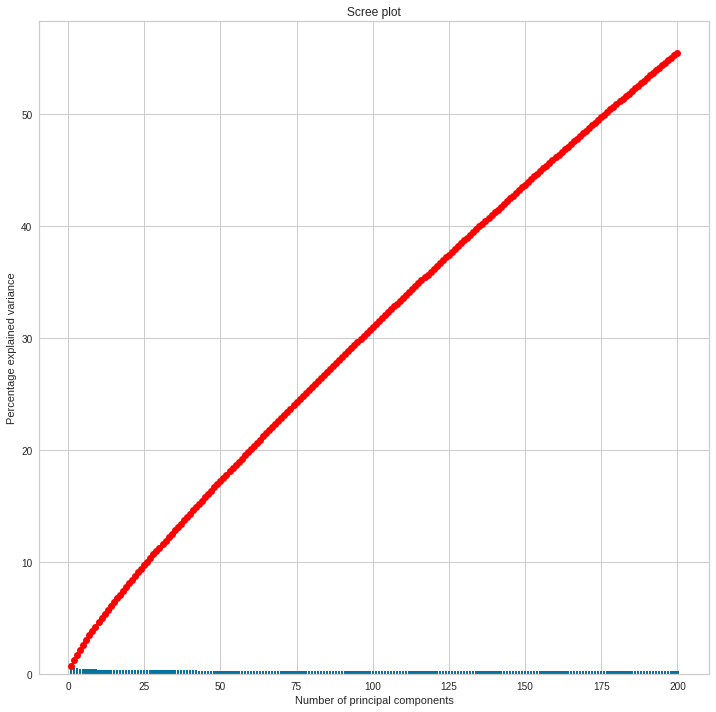

In [93]:
plt.figure(figsize=(12, 12))
display_scree_plot(pca)

On peut voir qu'au fur et à mesure cela réduit, mais que le pourcentage de variance expliquée est relativement faible..

### Cercle de corrélation :

<Figure size 1440x1440 with 0 Axes>

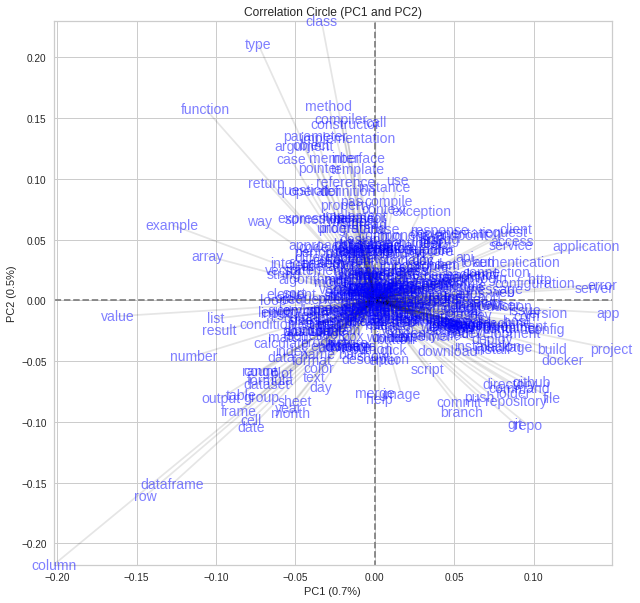

In [94]:
plt.figure(figsize=(20, 20))
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

### Vectorisation de la PC1 et PC2 :

<Figure size 2160x2160 with 0 Axes>

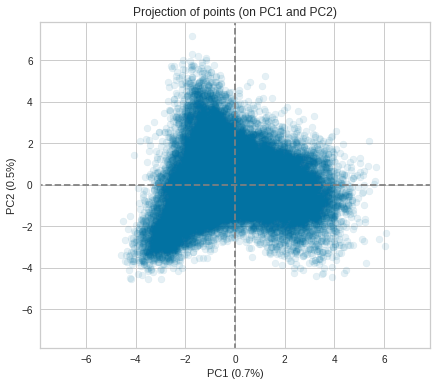

In [95]:
X_projected = pca.transform(X_scaled) 

plt.figure(figsize=(30, 30))
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.1)
plt.show()

On peut voir ici que la PCA n'est pas pertinente, de ce fait on ne retiendra pas l'acp.

## LDA :

Hypothése de la LDA à confirmer :

    - Chaque document du corpus est un ensemble de mots sans ordre (bag-of-words)
    
    - Chaque document n'aborde un certain nombre de thèmes dans différentes proportions qui lui sont propres p(θm)

    - Chaque mot possède une distribution associée à chaque thème p(ϕk)
    
    - Zn représente le thème du mot Wn


In [96]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

### lda opti pour le BOW :

In [97]:
"""def lda_opti (texts) :

    score = []
    perplexity = []
    N = [5, 6, 7, 8, 9, 10, 11, 12, 15, 18, 20, 30]
    
    for n_comp in N :
        
        lda_model = LatentDirichletAllocation(random_state=0, n_components= n_comp, verbose = 2) # no random
        lda_fit = lda_model.fit(texts)
        lda_output = lda_fit.transform(texts)
        lda_score =  lda_fit.score(texts)
        score.append(lda_score)
        #print("Le score de cohérence est de :", score)
        lda_perplexity =lda_fit.perplexity(texts)
        perplexity.append(lda_perplexity)
        #print("Le score de perplexité est de :", perplexity)

    return(score, perplexity)"""

'def lda_opti (texts) :\n\n    score = []\n    perplexity = []\n    N = [5, 6, 7, 8, 9, 10, 11, 12, 15, 18, 20, 30]\n    \n    for n_comp in N :\n        \n        lda_model = LatentDirichletAllocation(random_state=0, n_components= n_comp, verbose = 2) # no random\n        lda_fit = lda_model.fit(texts)\n        lda_output = lda_fit.transform(texts)\n        lda_score =  lda_fit.score(texts)\n        score.append(lda_score)\n        #print("Le score de cohérence est de :", score)\n        lda_perplexity =lda_fit.perplexity(texts)\n        perplexity.append(lda_perplexity)\n        #print("Le score de perplexité est de :", perplexity)\n\n    return(score, perplexity)'

In [98]:
"""def lda_opti (texts) :

    lda_model = LatentDirichletAllocation(random_state=0) # no random
    score = []
    perplexity = []
    
    # Hyperparameters :
    params = { 
        'n_components': [5, 6, 7, 8, 9, 10, 11, 12, 15, 18, 20, 30], # number of component
        'learning_decay': [0.75, 0.80, 0.85] # learning rate from online method
    }

    # GridSearchCV :
    lda_search = GridSearchCV(lda_model,
                              param_grid=params,
                              #n_jobs=-1,
                              cv=5,
                              verbose=2
                             )
    
    
    lda_fit = lda_search.fit(texts) # fit data
    lda_output = lda_fit.transform(texts) # tranform data
    lda_score =  lda_fit.score(texts)
    score.append(lda_score)
    lda_perplexity =lda_fit.perplexity(texts)
    perplexity.append(lda_perplexity)
    
    return(score, perplexity, lda_output)"""

# Une méthode plus rapide a été utilisée.

"def lda_opti (texts) :\n\n    lda_model = LatentDirichletAllocation(random_state=0) # no random\n    score = []\n    perplexity = []\n    \n    # Hyperparameters :\n    params = { \n        'n_components': [5, 6, 7, 8, 9, 10, 11, 12, 15, 18, 20, 30], # number of component\n        'learning_decay': [0.75, 0.80, 0.85] # learning rate from online method\n    }\n\n    # GridSearchCV :\n    lda_search = GridSearchCV(lda_model,\n                              param_grid=params,\n                              #n_jobs=-1,\n                              cv=5,\n                              verbose=2\n                             )\n    \n    \n    lda_fit = lda_search.fit(texts) # fit data\n    lda_output = lda_fit.transform(texts) # tranform data\n    lda_score =  lda_fit.score(texts)\n    score.append(lda_score)\n    lda_perplexity =lda_fit.perplexity(texts)\n    perplexity.append(lda_perplexity)\n    \n    return(score, perplexity, lda_output)"

In [99]:
"""
%%time
coherence_bow, perplexity_bow = lda_opti(bow)

import pickle
# Pour stock les données du lda bow :
pickle.dump(coherence_bow, open('score_bow.pkl', 'wb'))
pickle.dump(perplexity_bow, open('perplexity_bow.pkl', 'wb'))
# XXX.to_csv("P5_bow_lda.csv", index=False) # Cela permettra d'éviter de relancer le lda
# Une méthode plus rapide a été utilisée.
"""

'\n%%time\ncoherence_bow, perplexity_bow = lda_opti(bow)\n\nimport pickle\n# Pour stock les données du lda bow :\npickle.dump(coherence_bow, open(\'score_bow.pkl\', \'wb\'))\npickle.dump(perplexity_bow, open(\'perplexity_bow.pkl\', \'wb\'))\n# XXX.to_csv("P5_bow_lda.csv", index=False) # Cela permettra d\'éviter de relancer le lda\n# Une méthode plus rapide a été utilisée.\n'

In [100]:
"""%%time
# Define Search Param
params = {'n_components': [5, 6, 7, 8, 9, 10, 20, 30],
          'learning_decay': [.5, .7, .9]
          }

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda,
                     param_grid=params,
                     cv=5,
                     verbose=2,
                     n_jobs=-1,
                     )

# Do the Grid Search
model.fit(bow)
lda_output = model.transform(bow)

# Modéle à choisir
best_lda_model = model.best_estimator_

# meilleure paramétres :
print("Meilleurs paramétres : ", model.best_params_)

# Score de cohérence :
print("Meilleur Score de cohérence : ", model.best_score_)

# Score de perplexité :
print("Meilleur score de perplexité : ", best_lda_model.perplexity(bow))

# A mettre en commentaire une fois le best parameter trouvé
## Wall time: 17min 39s"""

'%%time\n# Define Search Param\nparams = {\'n_components\': [5, 6, 7, 8, 9, 10, 20, 30],\n          \'learning_decay\': [.5, .7, .9]\n          }\n\n# Init the Model\nlda = LatentDirichletAllocation(random_state=0)\n\n# Init Grid Search Class\nmodel = GridSearchCV(lda,\n                     param_grid=params,\n                     cv=5,\n                     verbose=2,\n                     n_jobs=-1,\n                     )\n\n# Do the Grid Search\nmodel.fit(bow)\nlda_output = model.transform(bow)\n\n# Modéle à choisir\nbest_lda_model = model.best_estimator_\n\n# meilleure paramétres :\nprint("Meilleurs paramétres : ", model.best_params_)\n\n# Score de cohérence :\nprint("Meilleur Score de cohérence : ", model.best_score_)\n\n# Score de perplexité :\nprint("Meilleur score de perplexité : ", best_lda_model.perplexity(bow))\n\n# A mettre en commentaire une fois le best parameter trouvé\n## Wall time: 17min 39s'

In [101]:
%%time
# Define Search Param
params = {'n_components': [5],
          'learning_decay': [.5]
         }

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda,
                     param_grid=params,
                     cv=5,
                     verbose=2,
                     n_jobs=-1,
                    )

# Do the Grid Search
model.fit(bow)
lda_output = model.transform(bow)

# Modéle à choisir
best_lda_model = model.best_estimator_

# Score de cohérence :
print("Meilleur Score de cohérence : ", model.best_score_)

# Score de perplexité :
print("Meilleur score de perplexité : ", best_lda_model.perplexity(bow))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Meilleur Score de cohérence :  -447875.4516468515
Meilleur score de perplexité :  225.29600647455945
CPU times: user 1min 48s, sys: 1.07 s, total: 1min 49s
Wall time: 7min 41s


On a confirmation que le nombre de LDA optimal pour le BOW est 6.

#### Visualisation : 

In [102]:
"""# Get Log Likelyhoods from Grid Search Output
n_topics = [5, 6, 7, 8, 9, 10, 20, 30]

log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(
    model.cv_results_['params']) if gscore['learning_decay'] == 0.5]


log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(
    model.cv_results_['params']) if gscore['learning_decay'] == 0.7]

log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(
    model.cv_results_['params']) if gscore['learning_decay'] == 0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()"""

'# Get Log Likelyhoods from Grid Search Output\nn_topics = [5, 6, 7, 8, 9, 10, 20, 30]\n\nlog_likelyhoods_5 = [round(model.cv_results_[\'mean_test_score\'][index]) for index, gscore in enumerate(\n    model.cv_results_[\'params\']) if gscore[\'learning_decay\'] == 0.5]\n\n\nlog_likelyhoods_7 = [round(model.cv_results_[\'mean_test_score\'][index]) for index, gscore in enumerate(\n    model.cv_results_[\'params\']) if gscore[\'learning_decay\'] == 0.7]\n\nlog_likelyhoods_9 = [round(model.cv_results_[\'mean_test_score\'][index]) for index, gscore in enumerate(\n    model.cv_results_[\'params\']) if gscore[\'learning_decay\'] == 0.9]\n\n# Show graph\nplt.figure(figsize=(12, 8))\nplt.plot(n_topics, log_likelyhoods_5, label=\'0.5\')\nplt.plot(n_topics, log_likelyhoods_7, label=\'0.7\')\nplt.plot(n_topics, log_likelyhoods_9, label=\'0.9\')\nplt.title("Choosing Optimal LDA Model")\nplt.xlabel("Num Topics")\nplt.ylabel("Log Likelyhood Scores")\nplt.legend(title=\'Learning decay\', loc=\'best\')

#### Topic dominant :

Une partie du code provient de ce site :

source : https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

In [103]:
%%time
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(bow)

# column names
topicnames = ['topic' + str(i) for i in range(best_lda_model.n_components)] # crée une liste de colonne  en fonction du nombre de composante n

# index names
docnames = ['Document' + str(i) for i in range(bow.toarray().shape[0])] # crée une liste de ligne en fonction du nombre de lignes de Bag of Words


# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

CPU times: user 6.92 s, sys: 140 ms, total: 7.06 s
Wall time: 7.35 s


,topic0,topic1,topic2,topic3,topic4,dominant_topic
Document0,0.160000,0.010000,0.390000,0.010000,0.430000,4
Document1,0.870000,0.030000,0.030000,0.030000,0.030000,0
Document2,0.280000,0.310000,0.040000,0.040000,0.330000,4
Document3,0.900000,0.010000,0.070000,0.010000,0.010000,0
Document4,0.390000,0.020000,0.540000,0.020000,0.020000,2
Document5,0.870000,0.030000,0.030000,0.030000,0.030000,0
Document6,0.600000,0.060000,0.000000,0.000000,0.330000,0
Document7,0.020000,0.020000,0.020000,0.910000,0.020000,3
Document8,0.050000,0.050000,0.050000,0.800000,0.050000,3
Document9,0.060000,0.010000,0.570000,0.010000,0.350000,2


#### Review des topics en fonction des documents :

In [104]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,7543
1,4,7174
2,1,6324
3,3,5306
4,2,4817


#### Visualisation :

In [105]:
%%time
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = cv.get_feature_names_out()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head(10)

CPU times: user 2.89 ms, sys: 0 ns, total: 2.89 ms
Wall time: 2.89 ms


,access,account,action,add,address,advance,advice,algorithm,amount,android,...,version,video,view,way,web,website,window,word,work,year
topic0,457.375435,0.250322,3.955561,145.892953,1.057972,241.038983,24.161078,0.200998,0.800876,167.607763,...,2627.269967,0.202165,0.388989,1502.422700,72.058379,19.987522,1.975497,0.201300,1615.671759,0.202702
topic1,1749.895486,819.494153,79.969842,50.597423,423.790249,127.074037,89.234794,0.201156,50.309983,112.337317,...,659.416364,663.570900,0.406720,1419.551519,447.393352,111.664236,161.599610,0.200822,936.057500,0.205118
topic2,22.638468,3.963360,545.497708,88.397868,1.078950,225.500841,56.430843,0.201556,50.415823,49.653593,...,185.610088,3.822407,1210.573521,1313.133444,93.143499,218.944520,486.954928,0.209168,884.827558,0.202094
topic3,94.942615,17.089709,0.374526,88.589092,7.140871,237.579957,54.786763,3.858866,214.688167,0.200456,...,5.178207,0.202009,1.399049,1897.767262,0.202951,0.201345,53.176930,0.562710,473.228761,230.897854
topic4,12.147997,0.202456,0.202364,17.522664,135.931958,292.806182,77.386521,339.537424,167.785151,0.200871,...,150.525374,0.202518,0.231720,2736.125074,0.201820,0.202377,34.293035,530.826000,1067.214422,174.492232


#### Visualisation du top des mots par topic : 

In [106]:
for topic in range(df_topic_keywords.shape[0]):
    tmp = df_topic_keywords.iloc[topic]
    print(f'Pour le Topic {topic+1}, les mots avec les plus hautes valeurs sont :')
    print(tmp.nlargest(15))
    print('\n')

Pour le Topic 1, les mots avec les plus hautes valeurs sont :
error        6356.279123
file         6126.754756
class        3991.913232
code         3633.030400
project      3403.811061
version      2627.269967
package      2003.252917
method       1949.302180
problem      1737.446426
work         1615.671759
use          1593.098315
way          1502.422700
script       1353.428253
component    1196.530374
module       1173.397552
Name: topic0, dtype: float64


Pour le Topic 2, les mots avec les plus hautes valeurs sont :
application    2322.004564
server         1913.193832
app            1782.621689
error          1772.935808
access         1749.895486
service        1535.171048
http           1471.366512
code           1459.310149
way            1419.551519
request        1401.060931
client         1356.143953
issue          1308.818081
container      1295.188959
command        1291.524319
problem        1267.021631
Name: topic1, dtype: float64


Pour le Topic 3, les mots avec les

### lda opti pour le IDF :

In [107]:
"""%%time
# Define Search Param
params = {'n_components': [5, 6, 7, 8, 9, 10, 20, 30],
          'learning_decay': [.5, .7, .9]
          }

# Init the Model
lda_idf = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model_idf = GridSearchCV(lda_idf,
                     param_grid=params,
                     cv=5,
                     verbose=2,
                     #n_jobs=-1,
                     )

# Do the Grid Search
model_idf.fit(idf)
lda_output = model_idf.transform(idf)

# Modéle à choisir
best_lda_model_idf = model_idf.best_estimator_

# meilleure paramétres :
print("Meilleurs paramétres : ", model_idf.best_params_)

# Score de cohérence :
print("Meilleur Score de cohérence : ", model_idf.best_score_)

# Score de perplexité :
print("Meilleur score de perplexité : ", best_lda_model_idf.perplexity(idf))

# A mettre en commentaire une fois le best parameter trouvé
## Wall time: 50min 43s"""

'%%time\n# Define Search Param\nparams = {\'n_components\': [5, 6, 7, 8, 9, 10, 20, 30],\n          \'learning_decay\': [.5, .7, .9]\n          }\n\n# Init the Model\nlda_idf = LatentDirichletAllocation(random_state=0)\n\n# Init Grid Search Class\nmodel_idf = GridSearchCV(lda_idf,\n                     param_grid=params,\n                     cv=5,\n                     verbose=2,\n                     #n_jobs=-1,\n                     )\n\n# Do the Grid Search\nmodel_idf.fit(idf)\nlda_output = model_idf.transform(idf)\n\n# Modéle à choisir\nbest_lda_model_idf = model_idf.best_estimator_\n\n# meilleure paramétres :\nprint("Meilleurs paramétres : ", model_idf.best_params_)\n\n# Score de cohérence :\nprint("Meilleur Score de cohérence : ", model_idf.best_score_)\n\n# Score de perplexité :\nprint("Meilleur score de perplexité : ", best_lda_model_idf.perplexity(idf))\n\n# A mettre en commentaire une fois le best parameter trouvé\n## Wall time: 50min 43s'

In [108]:
%%time
# Define Search Param
params = {'n_components': [5],
          'learning_decay': [.5]
          }

# Init the Model
lda_idf = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model_idf = GridSearchCV(lda_idf,
                     param_grid=params,
                     cv=5,
                     verbose=2,
                     #n_jobs=-1,
                     )

# Do the Grid Search
model_idf.fit(idf)
lda_output = model_idf.transform(idf)

# Modéle à choisir
best_lda_model_idf = model_idf.best_estimator_

# meilleure paramétres :
print("Meilleurs paramétres : ", model_idf.best_params_)

# Score de cohérence :
print("Meilleur Score de cohérence : ", model_idf.best_score_)

# Score de perplexité :
print("Meilleur score de perplexité : ", best_lda_model_idf.perplexity(idf))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................learning_decay=0.5, n_components=5; total time=  54.0s
[CV] END .................learning_decay=0.5, n_components=5; total time=  46.8s
[CV] END .................learning_decay=0.5, n_components=5; total time=  48.0s
[CV] END .................learning_decay=0.5, n_components=5; total time=  47.3s
[CV] END .................learning_decay=0.5, n_components=5; total time=  48.7s
Meilleurs paramétres :  {'learning_decay': 0.5, 'n_components': 5}
Meilleur Score de cohérence :  -103296.66883908604
Meilleur score de perplexité :  523.955154116951
CPU times: user 5min 11s, sys: 5.27 s, total: 5min 16s
Wall time: 5min 16s


#### Topic dominant :

In [109]:
%%time
# Create Document - Topic Matrix
lda_output = best_lda_model_idf.transform(bow)

# column names
topicnames = ['topic' + str(i) for i in range(best_lda_model_idf.n_components)] # crée une liste de colonne  en fonction du nombre de composante n

# index names
docnames = ['Document' + str(i) for i in range(idf.toarray().shape[0])] # crée une liste de ligne en fonction du nombre de lignes de Bag of Words


# Make the pandas dataframe
df_document_topic_2 = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic_2 = np.argmax(df_document_topic_2.values, axis=1)
df_document_topic_2['dominant_topic'] = dominant_topic_2

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topic_2 = df_document_topic_2.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topic_2

CPU times: user 6.36 s, sys: 59.2 ms, total: 6.42 s
Wall time: 6.37 s


,topic0,topic1,topic2,topic3,topic4,dominant_topic
Document0,0.010000,0.010000,0.510000,0.460000,0.010000,2
Document1,0.030000,0.860000,0.030000,0.030000,0.030000,1
Document2,0.580000,0.300000,0.040000,0.040000,0.040000,0
Document3,0.900000,0.010000,0.080000,0.010000,0.010000,0
Document4,0.020000,0.550000,0.380000,0.020000,0.020000,1
Document5,0.030000,0.870000,0.030000,0.030000,0.030000,1
Document6,0.820000,0.000000,0.000000,0.160000,0.000000,0
Document7,0.020000,0.020000,0.020000,0.020000,0.910000,4
Document8,0.050000,0.050000,0.050000,0.790000,0.060000,3
Document9,0.240000,0.010000,0.630000,0.120000,0.010000,2


#### Recherche des topics en fonction des documents :

In [110]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,7543
1,4,7174
2,1,6324
3,3,5306
4,2,4817


#### Visualisation :

In [111]:
%%time
# Topic-Keyword Matrix
df_topic_keywords_2 = pd.DataFrame(best_lda_model_idf.components_)

# Assign Column and Index
df_topic_keywords_2.columns = cv.get_feature_names_out()
df_topic_keywords_2.index = topicnames

# View
df_topic_keywords_2.head(10)

CPU times: user 754 µs, sys: 0 ns, total: 754 µs
Wall time: 737 µs


,access,account,action,add,address,advance,advice,algorithm,amount,android,...,version,video,view,way,web,website,window,word,work,year
topic0,73.847600,0.264827,3.509166,23.715262,15.841031,41.384933,8.488791,3.687822,2.549212,0.201467,...,123.219696,0.201694,1.536892,267.390868,10.317711,3.909308,0.231877,1.436749,211.111680,0.200528
topic1,250.624438,157.148233,56.986336,25.963526,72.086992,60.544491,26.770239,0.201427,11.923813,55.461787,...,414.821371,118.310927,6.395004,236.199208,94.735885,41.220085,18.958145,0.200947,212.123969,0.408128
topic2,19.682165,2.612450,60.996032,18.613315,0.222196,48.091272,13.735427,0.201912,11.586244,24.864571,...,50.587555,29.616181,212.461912,167.695911,24.793565,45.516051,68.891969,0.202086,131.687810,0.201537
topic3,49.988950,1.344643,15.042052,23.116449,30.347925,32.301500,12.332657,14.039233,24.217678,0.200981,...,34.264421,0.204834,20.969217,281.646451,1.046266,0.203232,65.879681,0.213614,106.070704,0.201610
topic4,6.830797,12.531162,0.202628,8.948651,7.033334,86.965457,21.306749,67.737825,60.165936,0.200424,...,15.307114,0.202880,0.485953,252.414722,0.201631,0.201746,6.350257,128.889259,114.653660,94.843185


#### Visualisation du top des mots par topic : 

In [112]:
for topic in range(df_topic_keywords_2.shape[0]):
    tmp = df_topic_keywords_2.iloc[topic]
    print(f'Pour le Topic {topic+1}, les mots avec les plus hautes valeurs sont :')
    print(tmp.nlargest(15))
    print('\n')

Pour le Topic 1, les mots avec les plus hautes valeurs sont :
class        583.109210
function     517.789260
type         459.208862
code         446.930405
error        435.217272
method       333.843045
way          267.390868
file         260.878290
use          254.179312
example      229.228619
work         211.111680
parameter    189.459950
component    187.580692
problem      182.076337
package      174.812620
Name: topic0, dtype: float64


Pour le Topic 2, les mots avec les plus hautes valeurs sont :
error          625.993797
file           570.134642
project        457.084712
version        414.821371
app            379.251050
application    362.655785
command        333.502184
server         327.340050
code           297.040109
issue          294.126808
problem        263.361083
service        251.895621
access         250.624438
way            236.199208
folder         226.189817
Name: topic1, dtype: float64


Pour le Topic 3, les mots avec les plus hautes valeurs sont :
im

## NMF :

En algèbre linéaire et en analyse à plusieurs variables, la factorisation matricielle non négative est un groupe d’algorithmes qui permet de factoriser une matrice V en deux matrices (W et H) qui ne contiennent que des valeurs positives ou nulles et dont le produit est proche de V.

source : https://datafranca.org/wiki/Factorisation_matricielle_non_négative
source : https://predictivehacks.com/topic-modelling-with-nmf-in-python/

In [113]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
top_topics = 5
X = idf

In [115]:
%%time
# Create an NMF instance: model
# the 10 components will be the topics
model_nmf = NMF(n_components=top_topics, random_state= 0)
 
# Fit the model to TF-IDF
model_nmf.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model_nmf.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


CPU times: user 670 ms, sys: 270 ms, total: 940 ms
Wall time: 649 ms


In [116]:
print(f"Shape de X :")
display(X.shape)
print('')
print(f"Shape des features de NMF :")
display(nmf_features.shape)
print('')
print(f"Shape des composantes de NMF :")
display(model_nmf.components_.shape)

Shape de X :


(31164, 396)


Shape des features de NMF :


(31164, 5)


Shape des composantes de NMF :


(5, 396)

#### Visualisation du DataFrame :

In [117]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model_nmf.components_, columns=cv.get_feature_names_out())
components_df

,access,account,action,add,address,advance,advice,algorithm,amount,android,...,version,video,view,way,web,website,window,word,work,year
0,0.428466,0.144388,0.126716,0.094316,0.106515,0.278686,0.079704,0.109091,0.125975,0.032830,...,0.241612,0.156520,0.289572,1.984737,0.125345,0.090762,0.175430,0.114165,1.039648,0.061883
1,0.000000,0.006390,0.000000,0.012886,0.001387,0.085426,0.011936,0.000230,0.058061,0.000000,...,0.000000,0.000000,0.000000,0.156448,0.000000,0.000000,0.017040,0.054405,0.022427,0.106984
2,0.095427,0.013822,0.031855,0.045972,0.008237,0.049776,0.015640,0.000000,0.000701,0.035487,...,0.158819,0.059912,0.015727,0.000000,0.034867,0.012139,0.000766,0.032375,0.174213,0.000000
3,0.114823,0.066141,0.034519,0.017326,0.030663,0.049868,0.017246,0.000000,0.000000,0.065969,...,0.983060,0.000000,0.000000,0.000000,0.049928,0.032904,0.021768,0.000000,0.108884,0.003014
4,0.013816,0.001559,0.000000,0.001582,0.028600,0.019287,0.020550,0.012687,0.010393,0.000000,...,0.000000,0.000000,0.000000,0.094881,0.000000,0.000000,0.000000,0.016807,0.119234,0.000000


#### Visualisation du top des mots par topic : 

In [118]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'Pour le Topic {topic+1}, les mots avec les plus hautes valeurs sont :')
    print(tmp.nlargest(10))
    print('\n')

Pour le Topic 1, les mots avec les plus hautes valeurs sont :
code         3.226321
way          1.984737
problem      1.249281
example      1.208127
time         1.184751
class        1.142723
work         1.039648
use          1.014893
list         0.966981
something    0.902790
Name: 0, dtype: float64


Pour le Topic 2, les mots avec les plus hautes valeurs sont :
column       4.286692
value        1.782992
row          1.031785
dataframe    0.935771
output       0.593071
table        0.433245
number       0.425708
name         0.365971
example      0.358347
group        0.350350
Name: 1, dtype: float64


Pour le Topic 3, les mots avec les plus hautes valeurs sont :
file         4.991537
project      0.570003
folder       0.465179
command      0.425233
script       0.417221
line         0.389137
directory    0.323873
json         0.294417
output       0.273053
path         0.269647
Name: 2, dtype: float64


Pour le Topic 4, les mots avec les plus hautes valeurs sont :
error         

Ce lien m'a fortement aidé : https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook

# Approche supervisée :

## Création de colonne pour le futur X et y :

In [119]:
df_visualisation

,Corpus,Tags,corpus_preprocessing,tags_preprocessing,Tags_count
0,delete loop form option image input form array...,php foreach pdo associative-array,"[delete, loop, form, option, image, input, for...","[php, foreach, pdo, associative-array]",4
1,script mysql sql path way path path,mysql sql script,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",3
2,verification authentication python decode func...,python oauth-2.0 jwt rsa jwk,"[verification, authentication, python, decode,...","[python, oauth-2.0, jwt, rsa, jwk]",5
3,work context manager example manager file sugg...,python contextmanager,"[work, context, manager, example, manager, fil...","[python, contextmanager]",2
4,branch protection rule configuration branch br...,github,"[branch, protection, rule, configuration, bran...",[github],1
...,...,...,...,...,...
31159,class compile time class compile time code sni...,c++ c-preprocessor c++20 template-meta-program...,"[class, compile, time, class, compile, time, c...","[c++, c-preprocessor, c++20, template-meta-pro...",4
31160,inline constraint function implementation look...,typescript typescript-generics tsc generic-con...,"[inline, constraint, function, implementation,...","[typescript, typescript-generics, tsc, generic...",4
31161,classname javascript change class name li,javascript html css,"[classname, javascript, change, class, name, li]","[javascript, html, cs]",3
31162,input change size shape tap shape user input e...,swift swiftui augmented-reality realitykit,"[input, change, size, shape, tap, shape, user,...","[swift, swiftui, augmented-reality, realitykit]",4


In [120]:
df_modellisation = df_visualisation[['corpus_preprocessing','tags_preprocessing']]

In [121]:
df_modellisation['corpus_finish'] = df_modellisation['corpus_preprocessing'].apply(lambda x : " ".join(x))
df_modellisation['tags_finish'] = df_modellisation['tags_preprocessing'].apply(lambda x : " ".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
df_modellisation

,corpus_preprocessing,tags_preprocessing,corpus_finish,tags_finish
0,"[delete, loop, form, option, image, input, for...","[php, foreach, pdo, associative-array]",delete loop form option image input form array...,php foreach pdo associative-array
1,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",script mysql sql path way path path,mysql sql script
2,"[verification, authentication, python, decode,...","[python, oauth-2.0, jwt, rsa, jwk]",verification authentication python decode func...,python oauth-2.0 jwt rsa jwk
3,"[work, context, manager, example, manager, fil...","[python, contextmanager]",work context manager example manager file sugg...,python contextmanager
4,"[branch, protection, rule, configuration, bran...",[github],branch protection rule configuration branch br...,github
...,...,...,...,...
31159,"[class, compile, time, class, compile, time, c...","[c++, c-preprocessor, c++20, template-meta-pro...",class compile time class compile time code sni...,c++ c-preprocessor c++20 template-meta-program...
31160,"[inline, constraint, function, implementation,...","[typescript, typescript-generics, tsc, generic...",inline constraint function implementation look...,typescript typescript-generics tsc generic-con...
31161,"[classname, javascript, change, class, name, li]","[javascript, html, cs]",classname javascript change class name li,javascript html cs
31162,"[input, change, size, shape, tap, shape, user,...","[swift, swiftui, augmented-reality, realitykit]",input change size shape tap shape user input e...,swift swiftui augmented-reality realitykit


## Reduction du nombre de tags :

In [123]:
from nltk import FreqDist

In [124]:
frequence = FreqDist(df_modellisation['tags_finish'].tolist())

In [125]:
# on stock un dictionnaire du nombre de tags que l'on souhaite garder
from collections import Counter
top_50 = dict(Counter(frequence).most_common(50))

In [126]:
top_50_tags = []
for key,value in top_50.items() :
    top_50_tags.append(key)
# garder que les clefs

In [127]:
df_modellisation['tags_final'] = df_modellisation['tags_preprocessing'].apply(lambda x : [element for element in x if element in top_50_tags ])

In [139]:
df_modellisation

,corpus_preprocessing,tags_preprocessing,corpus_finish,tags_finish,tags_final
2,"[verification, authentication, python, decode,...","[python, oauth-2.0, jwt, rsa, jwk]",verification authentication python decode func...,python oauth-2.0 jwt rsa jwk,[python]
3,"[work, context, manager, example, manager, fil...","[python, contextmanager]",work context manager example manager file sugg...,python contextmanager,[python]
4,"[branch, protection, rule, configuration, bran...",[github],branch protection rule configuration branch br...,github,[github]
5,"[tidy, path, setup, directory, business, sourc...","[go, go-modules]",tidy path setup directory business source source,go go-modules,[go]
6,"[class, thing, class, time, class, memory, str...","[go, struct]",class thing class time class memory struct obj...,go struct,[go]
...,...,...,...,...,...
31150,"[property, project, prop, custom, documentatio...","[reactjs, material-ui]",property project prop custom documentation mui...,reactjs material-ui,[reactjs]
31155,"[Step, sdk, register, account, project, get, i...","[unity3d, mikros, mikros-analytics, mikros-gam...",Step sdk register account project get import p...,unity3d mikros mikros-analytics mikros-game-an...,[unity3d]
31159,"[class, compile, time, class, compile, time, c...","[c++, c-preprocessor, c++20, template-meta-pro...",class compile time class compile time code sni...,c++ c-preprocessor c++20 template-meta-program...,[c++]
31160,"[inline, constraint, function, implementation,...","[typescript, typescript-generics, tsc, generic...",inline constraint function implementation look...,typescript typescript-generics tsc generic-con...,[typescript]


In [129]:
liste_index = []
for i,l in df_modellisation.iterrows() :
    if len(l['tags_final']) == 0 :
        liste_index.append(i)
print(f"Le nombre de lignes qui seront supprimés est de :", len(liste_index))
print("fLe nombre de ligne du dataframe avant suppression est de :", df_modellisation.shape[0])
df_modellisation.drop(liste_index, inplace = True) # suppression de la liste
print("fLe nombre de ligne du dataframe aprés suppression est de :", df_modellisation.shape[0])

Le nombre de lignes qui seront supprimés est de : 11230
fLe nombre de ligne du dataframe avant suppression est de : 31164
fLe nombre de ligne du dataframe aprés suppression est de : 19934


In [130]:
df_modellisation_1 = df_modellisation[['corpus_finish','tags_final']].copy()

# CSV pour les algo : 

In [140]:
df_modellisation.to_csv("P5_algorithme.csv", index=False) # Cela permettra d'éviter d'attendre de relancer le notebook.

In [141]:
vectorizer = CountVectorizer(min_df = 200)
corpus_bow = vectorizer.fit_transform(df_modellisation_1['corpus_finish'])

In [142]:
%%time
data_bow,bow = bag_of_words(df_visualisation["Corpus"])

CPU times: user 994 ms, sys: 10 ms, total: 1 s
Wall time: 1.01 s


## Algorithme utilisant le BOW : 

### Train test via BOW :

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

In [144]:
y = df_modellisation_1['tags_final']
multi_lab = MultiLabelBinarizer(classes= top_50_tags)
Y = multi_lab.fit_transform(y)

print("Affichage des classes du multilabel :")
display(multi_lab.classes_)

Affichage des classes du multilabel :


array(['excel vba', '', 'python panda', 'python',
       'python panda dataframe', 'typescript', 'html cs', 'javascript',
       'c++', 'powershell', 'git', 'ggplot2', 'rust',
       'javascript reactjs', 'flutter', 'java', 'flutter dart',
       'javascript html cs', 'reactjs', 'dplyr',
       'android android-jetpack-compose', 'javascript html',
       'excel excel-formula', 'python python-3.x', 'python numpy',
       'shiny', 'codenameone', 'data.table', 'excel', 'python django',
       'git github', 'python panda numpy', 'unity3d',
       'typescript typescript-generics', 'github', 'reactjs material-ui',
       'cs', 'java java-stream', 'github github-actions', 'angular',
       'javascript typescript', 'ansible', 'go', 'kubernetes',
       'react-native', 'android', 'elasticsearch', 'python matplotlib',
       'gitlab', 'reactjs react-hooks'], dtype=object)

In [145]:
X = corpus_bow # a modifier par tfidf et par wordtovec
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [146]:
def multiscore(y_test, y_pred):
    print("-"*53)
    print('')
    print(">"*15, "Accuracy :",
          '\033[1m' + str(round(metrics.accuracy_score(y_test, y_pred), 2)) + '\033[0m', "<"*20),
    print('')
    print("-"*53)
    print('')
    print(">"*15, "Hamming loss :",
          '\033[1m' + str(round(metrics.hamming_loss(y_test, y_pred), 2)) + '\033[0m', "<"*17),
    print('')
    print("-"*53)
    print('')
    print(">"*15, "Jaccard_score :", '\033[1m' + str(round(metrics.jaccard_score(y_test, y_pred, average="weighted"), 2))
          + '\033[0m', "<"*16),
    print('')
    print("-"*53)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import LinearSVC

### Regression logistique :

In [154]:
def regression_log (X_train, y_train, X_test) :
  
  model_svm = OneVsRestClassifier(LinearSVC())
  model_svm.fit(X_train, y_train)
  y_pred = model_svm.predict(X_test)
  
  return y_pred

In [155]:
%%time
regression_log (X_train, y_train, X_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [156]:
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------


In [151]:
"""%%time
model_log = OneVsRestClassifier(LogisticRegression())
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)"""
# Mis en fonction 

CPU times: user 5.68 s, sys: 17.4 ms, total: 5.7 s
Wall time: 7.98 s


### Random Forest :

In [159]:
def random_forest (X_train, y_train, X_test) :

  model_rf = OneVsRestClassifier(RandomForestClassifier())
  model_rf.fit(X_train, y_train)
  y_pred = model_rf.predict(X_test) 
  return y_pred

In [160]:
%%time
random_forest (X_train, y_train, X_test)

CPU times: user 2min 15s, sys: 610 ms, total: 2min 16s
Wall time: 2min 35s


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [161]:
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------


In [ ]:
"""%%time
model_rf = OneVsRestClassifier(RandomForestClassifier())
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)"""
# mis en fonction

### Decision tree : 

In [162]:
def decision_tree (X_train, y_train, X_test) :

  model_tree = OneVsRestClassifier(DecisionTreeClassifier())
  model_tree.fit(X_train, y_train)
  y_pred = model_tree.predict(X_test) 
  return y_pred

In [163]:
%%time
decision_tree (X_train, y_train, X_test)

CPU times: user 11.4 s, sys: 15.4 ms, total: 11.4 s
Wall time: 11.4 s


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [164]:
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------


In [ ]:
"""%%time
model_tree = OneVsRestClassifier(DecisionTreeClassifier())
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)"""
# Mis en fonction

### KNN : 

In [165]:
def KNeighbors (X_train, y_train, X_test) :

  model_knn = OneVsRestClassifier(KNeighborsClassifier())
  model_knn.fit(X_train, y_train)
  y_pred = model_knn.predict(X_test)
  return y_pred

In [166]:
%%time
KNeighbors (X_train, y_train, X_test)

CPU times: user 50.9 s, sys: 833 ms, total: 51.7 s
Wall time: 53.7 s


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [167]:
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------


In [ ]:
"""%%time
model_knn = OneVsRestClassifier(KNeighborsClassifier())
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)"""
# Mis en fonction

### Xgboost :

In [169]:
def xgboost (X_train, y_train, X_test) :

  model_xgb = OneVsRestClassifier(XGBRegressor())
  model_xgb.fit(X_train, y_train)
  y_pred = model_xgb.predict(X_test)  
  return y_pred

In [170]:
%%time
xgboost (X_train, y_train, X_test)

[12:45:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [171]:
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------


In [ ]:
"""%%time
model_xgb = OneVsRestClassifier(XGBRegressor())
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)"""
# mis en fonction

In [ ]:
#print_score(model, y_test, y_pred) # A implanter par la suite

### Linear SVC :

In [172]:
def linear_SVC (X_train, y_train, X_test) :

  model_svm = OneVsRestClassifier(LinearSVC())
  model_svm.fit(X_train, y_train)
  y_pred = model_svm.predict(X_test) 
  return y_pred

In [173]:
%%time
linear_SVC (X_train, y_train, X_test)

CPU times: user 19.2 s, sys: 43.2 ms, total: 19.2 s
Wall time: 24.3 s


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [175]:
multiscore (test_labels, y_pred)

NameError: ignored

In [174]:
"""%%time
model_svm = OneVsRestClassifier(LinearSVC())
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)"""
# Mis en fonction

'%%time\nmodel_svm = OneVsRestClassifier(LinearSVC())\nmodel_svm.fit(X_train, y_train)\n\ny_pred = model_svm.predict(X_test)'

In [ ]:
#print_score(model, y_test, y_pred) # A implanter par la suite

## Algorithme utilisant le tf-idf :

### Train test via tf-idf :

In [177]:
tf_idf_vec = TfidfVectorizer(min_df = 200)
corpus_idf = tf_idf_vec.fit_transform(df_modellisation_1['corpus_finish'])

In [178]:
X = corpus_idf # a modifier par tfidf et par wordtovec
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Regression Logistique :

In [179]:
%%time
regression_log (X_train, y_train, X_test)
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------
CPU times: user 1.24 s, sys: 5.97 ms, total: 1.25 s
Wall time: 1.24 s


### Random Forest :

In [180]:
%%time
random_forest (X_train, y_train, X_test)
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------
CPU times: user 2min 54s, sys: 356 ms, total: 2min 55s
Wall time: 3min 3s


### Decision tree : 

In [181]:
%%time
decision_tree (X_train, y_train, X_test)
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------
CPU times: user 31.8 s, sys: 26.8 ms, total: 31.9 s
Wall time: 31.7 s


### KNN : 

In [182]:
%%time
KNeighbors (X_train, y_train, X_test)
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------
CPU times: user 50.8 s, sys: 308 ms, total: 51.2 s
Wall time: 53.5 s


### Xgboost :

In [183]:
%%time
xgboost (X_train, y_train, X_test)
multiscore (y_test, y_pred)

[12:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Linear SVC :

In [184]:
%%time
linear_SVC (X_train, y_train, X_test)
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------
CPU times: user 1.22 s, sys: 7 ms, total: 1.23 s
Wall time: 1.22 s


## Algorithme utilisant le word2vec :

### Train test via word2vec :

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [ ]:
!pip install gensim==4.2.0

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 64 # taille des phrases à vérifier pour le max
sentences = df_modellisation_1['corpus_finish'].tolist()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=4)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

In [ ]:
X = x_sentences # a modifier par tfidf et par wordtovec
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Regression Logistique :

In [ ]:
%%time
regression_log (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Random Forest :

In [ ]:
%%time
random_forest (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Decision Tree Classifier :

In [ ]:
%%time
decision_tree (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### K.N.N :

In [ ]:
%%time
KNeighbors (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Xgboost :

In [ ]:
%%time
xgboost (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Linear S.V.C :

In [ ]:
%%time
linear_SVC (X_train, y_train, X_test)
multiscore (y_test, y_pred)

## Algorithme utilisant Bert : 

### Train test via Bert :

In [ ]:
!pip install transformers
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
max_length = 64 # taille des phrases à vérifier pour le max
batch_size = 10 
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_modellisation['corpus_finish'].tolist()

In [ ]:
%%time
import time
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

In [ ]:
features_bert

In [ ]:
X = features_bert
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Regression Logistique :

In [ ]:
%%time
regression_log (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Random Forest :

In [ ]:
%%time
random_forest (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Decision Tree Classifier :

In [ ]:
%%time
decision_tree (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### K.N.N :

In [ ]:
%%time
KNeighbors (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Xgboost :

In [ ]:
%%time
xgboost (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Linear S.V.C :

In [ ]:
%%time
linear_SVC (X_train, y_train, X_test)
multiscore (y_test, y_pred)

## Algorithme utilisant USE :

### Train test via USE :

In [185]:
import tensorflow_hub as tf_hub

In [186]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model =  tf_hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [187]:
x1 = embed(df_modellisation_1['corpus_finish'].tolist())

In [188]:
x1 = np.array(x1)

In [189]:
x1.shape

(19934, 512)

In [190]:
X = x1 # pour la méthode USE
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Regression Logistique :

In [191]:
%%time
regression_log (X_train, y_train, X_test)
multiscore (y_test, y_pred)

-----------------------------------------------------

>>>>>>>>>>>>>>> Accuracy : 0.17 <<<<<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Hamming loss : 0.02 <<<<<<<<<<<<<<<<<

-----------------------------------------------------

>>>>>>>>>>>>>>> Jaccard_score : 0.19 <<<<<<<<<<<<<<<<

-----------------------------------------------------
CPU times: user 16.9 s, sys: 383 ms, total: 17.3 s
Wall time: 17.7 s


### Random Forest :

In [ ]:
%%time
random_forest (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Decision Tree Classifier :

In [ ]:
%%time
decision_tree (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### K.N.N :

In [ ]:
%%time
KNeighbors (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Xgboost :

In [ ]:
%%time
xgboost (X_train, y_train, X_test)
multiscore (y_test, y_pred)

### Linear S.V.C :

In [ ]:
%%time
linear_SVC (X_train, y_train, X_test)
multiscore (y_test, y_pred)

## Choix du meilleur algorithme :